# KNN Classifier

In [64]:
import os
os.chdir("C:\\datasciencepractice")

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Import data Set

In [65]:
df=pd.read_csv("teleCust1000t.csv")
df.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [66]:
df["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021048ECBC88>]],
      dtype=object)

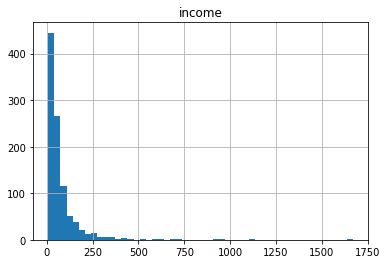

In [67]:
df.hist(column="income",bins=50)

In [68]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [69]:
x=df[["region","tenure","age","marital","address","income","ed","employ","retire","gender","reside"]].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [50]:
y=df["custcat"].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

# Scalling of Data

In [70]:
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

# Split Data Set into Training and Testing

In [72]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=1/3,random_state=4)

print("Train Shape",train_x.shape,train_y.shape)
print("Test Shape",test_x.shape,test_y.shape)

Train Shape (666, 11) (666,)
Test Shape (334, 11) (334,)


# Bulid The Model With K==4

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
k=4
neigh=KNeighborsClassifier(n_neighbors=k)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

# fit and Testing of Model

In [77]:
neigh.fit(train_x,train_y)

y_test_hat=neigh.predict(test_x)
y_test_hat[0:5]

array([3, 1, 3, 2, 4], dtype=int64)

# find Accuarcy of train and test data set

In [78]:
from sklearn import metrics
print("Train set Accuarcy::",metrics.accuracy_score(train_y,neigh.predict(train_x)))
print("Test set Accuarcy::",metrics.accuracy_score(test_y,y_test_hat))

Train set Accuarcy:: 0.545045045045045
Test set Accuarcy:: 0.31137724550898205


# K==6

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [80]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.8,random_state=3)
knn=KNeighborsClassifier(n_neighbors=6).fit(xtrain,ytrain)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [81]:
ytest_hat=knn.predict(xtest)
ytest[0:10]

array([3, 3, 1, 4, 1, 4, 3, 1, 1, 3], dtype=int64)

In [82]:
from sklearn import metrics
print("Train set Accuracy::",metrics.accuracy_score(ytrain,knn.predict(xtrain)))
print("Test set Accuracy::",metrics.accuracy_score(ytest,ytest_hat))

Train set Accuracy:: 0.55
Test set Accuracy:: 0.335


# predict Best value of k

In [83]:
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusion_matrix=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(train_x,train_y)
    ypredict=neigh.predict(test_x)
    mean_acc[n-1]=metrics.accuracy_score(test_y,ypredict)
    std_acc[n-1]=np.std(ypredict==test_y)/np.sqrt(ypredict.shape[0])
mean_acc

array([0.27844311, 0.28742515, 0.30239521, 0.31137725, 0.32035928,
       0.31437126, 0.32335329, 0.30538922, 0.32335329])

# Plot graph for k value

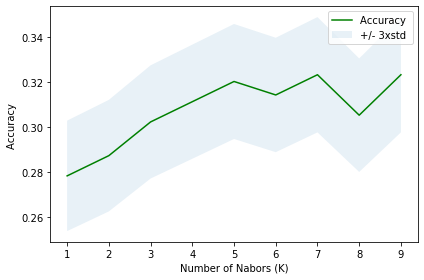

In [84]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [85]:
print("Best accuracy was with",mean_acc.max(),"with k=",mean_acc.argmax()+1)

Best accuracy was with 0.32335329341317365 with k= 7
